In [1]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 12.0 MB/s 


In [2]:
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 16.3 MB/s 
     |████████████████████████████████| 144 kB 66.8 MB/s 
     |████████████████████████████████| 271 kB 58.4 MB/s 
     |████████████████████████████████| 94 kB 1.0 MB/s 


In [3]:
!pip install spacy
!python -m spacy download es_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 10.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
stop = stopwords.words('spanish')
stop

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [7]:
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, Flatten
from keras.datasets import imdb


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [9]:
class LemmaTokenizer:
    def __init__(self):
        self.nlp = spacy.load("es_core_news_sm")
    def __call__(self, doc):
        doc = self.nlp(doc)
        tokens = []
        for token in doc:
            lexeme = self.nlp.vocab[token.text]
            if lexeme.is_stop == False and not lexeme.is_punct and token.text.isalnum():
                tokens.append(token.lemma_)
        return tokens

In [10]:
FILEPATH = "https://storage.googleapis.com/tfm_aideas_datasets/dataset_20210101_20210131_news.csv"

In [11]:
dataset = pd.read_csv(FILEPATH, sep=";", index_col=0, parse_dates=["date"])
dataset

,date,title,url,body,tags,resource,ticker,ticker_name,sector,subsector,...,alpha_exante_above_Q3,vola20_exante,vola20_expost,vola20_antepost_pct_change,vola20_umbral_Q1,vola20_umbral_abs_Q1,vola20_umbral_Q3,vola20_umbral_abs_Q3,vola_label,vola_label_abs
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,2020-12-31 23:30:00,"Pasaportes, visados, ‘roaming’... Todos los ca...",https://elpais.com/internacional/2020-12-31/pa...,¿DNI o pasaporte? ¿Hay que pedir visado? ¿Sirv...,"['Brexit', 'Reino Unido', 'Europa', 'Comercio'...",ELPAIS,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,False,0.595548,0.646779,0.086025,0.053808,0.114337,0.305009,0.417972,0,0
1656287513236_43316_ANA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,ANA,"ACCIONA,S.A.","Mat.Basicos, Industria y Construcción",Construcción,...,False,0.330038,0.410053,0.242440,-0.011209,0.103677,0.208834,0.225065,1,1
1656287513236_43316_BKIA,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,BKIA,"BANKIA, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.261637,0.452613,0.729930,0.057276,0.103478,0.236113,0.315340,1,1
1656287513236_43316_CABK,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,CABK,"CAIXABANK, S.A.",Servicios Financieros,Bancos y Cajas de Ahorro,...,False,0.269002,0.451665,0.679042,0.092034,0.139145,0.290371,0.324701,1,1
1656287513236_43316_IAG,2021-01-01 02:06:52,Las claves de la caída del Ibex,https://www.abc.es/economia/abci-claves-caida-...,24 componentes en negativo<EOL>El Ibex cierra ...,"['Apple', 'Gamesa', 'Amazon', 'Iberia', 'Accio...",ABC,IAG,INTERNATIONAL CONSOLIDAT. AIRLINES GROUP,Servicios de Consumo,Transporte y Distribución,...,False,0.595548,0.646779,0.086025,0.053808,0.114337,0.305009,0.417972,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656306940203_43316_REE,2021-03-01 11:48:00,"El Ibex 35 sube un 0,66% a media sesión, con N...",https://www.europapress.es/economia/bolsa-0034...,Los títulos de PharmaMar repuntaban también un...,"['IBEX 35', 'Naturgy (Gas Natural)', 'IFM - Na...",EUROPAPRESS,REE,"RED ELECTRICA CORPORACION, S.A.",Petróleo y Energía,Electricidad y Gas,...,False,0.267480,0.171384,-0.359263,0.222160,0.322949,0.456074,0.456074,-1,0
1656306940203_43316_SGRE,2021-03-01 11:48:00,"El Ibex 35 sube un 0,66% a media sesión, con N...",https://www.europapress.es/economia/bolsa-0034...,Los títulos de PharmaMar repuntaban también un...,"['IBEX 35', 'Naturgy (Gas Natural)', 'IFM - Na...",EUROPAPRESS,SGRE,"SIEMENS GAMESA RENEWABLE ENERGY, S.A.","Mat.Basicos, Industria y Construcción",Fabric. y Montaje Bienes de Equipo,...,False,0.403294,0.481854,0.194796,0.027436,0.048373,0.108241,0.141547,1,1
1656306940203_43316_SLR,2021-03-01 11:48:00,"El Ibex 35 sube un 0,66% a media sesión, con N...",https://www.europapress.es/economia/bolsa-0034...,Los títulos de PharmaMar repuntaban también un...,"['IBEX 35', 'Naturgy (Gas Natural)', 'IFM - Na...",EUROPAPRESS,SLR,"SOLARIA ENERGIA Y MEDIO AMBIENTE, S.A.",Petróleo y Energía,Energías Renovables,...,False,0.768041,0.639412,-0.167476,-0.177970,0.149105,-0.132403,0.186968,0,0


In [35]:
dataset.shape

(4025, 37)

In [12]:
dataset['texto_limpio'] = dataset['body'].apply(
    lambda x: ' '.join(LemmaTokenizer()(x.lower()))
    )

In [13]:
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = LemmaTokenizer())

In [14]:
cv.fit(dataset['texto_limpio'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<__main__.LemmaTokenizer object at 0x7f587f5ae8d0>)

In [15]:
vector = cv.transform(dataset['texto_limpio'])

In [16]:
name_features = pd.DataFrame(vector.toarray(), columns=cv.get_feature_names(), index= dataset.index)
name_features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,00,000,001,0010,0020,00206,0034,005,007,...,óvulo,óxido,úbeda,úcar,últimamente,únetir,únicamente,único,útil,útlimo
pk,,,,,,,,,,,,,,,,,,,,,
1656287707697_43316_IAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1656287513236_43316_ANA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1656287513236_43316_BKIA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1656287513236_43316_CABK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1656287513236_43316_IAG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656306940203_43316_REE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1656306940203_43316_SGRE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1656306940203_43316_SLR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
name_features.shape

(4025, 31162)

In [17]:
lb = LabelEncoder()
labels = lb.fit_transform(dataset.vola_label)

In [21]:
from collections import Counter

labels_freq = Counter(labels)
labels_freq

Counter({0: 1317, 1: 1400, 2: 1308})

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
            name_features.values, labels, test_size=0.33
        )

In [23]:
np.unique(labels)

array([0, 1, 2])

In [24]:
print(x_train.shape)
x_test.shape

(2696, 31162)


(1329, 31162)

In [25]:
idx_labels_pos = np.where(y_train == 2)
idx_labels_pos = idx_labels_pos[0]
len(idx_labels_pos)

865

In [26]:
idx_labels_neg = np.where(y_train == 0)
idx_labels_neg = idx_labels_neg[0]
len(idx_labels_neg)

861

In [27]:
idx_labels_pos,idx_labels_neg

(array([   0,    1,    5,   18,   20,   21,   24,   26,   28,   29,   30,
          41,   46,   58,   59,   61,   63,   64,   68,   70,   71,   72,
          76,   79,   82,   86,   87,   91,   97,  100,  103,  106,  107,
         108,  110,  119,  126,  127,  130,  133,  134,  136,  137,  140,
         141,  142,  143,  144,  145,  146,  147,  148,  150,  153,  154,
         157,  158,  159,  161,  162,  165,  167,  169,  174,  181,  185,
         191,  195,  200,  203,  205,  206,  208,  212,  214,  218,  219,
         220,  222,  229,  230,  231,  235,  240,  245,  247,  249,  250,
         252,  255,  256,  259,  262,  265,  267,  273,  276,  282,  289,
         292,  294,  295,  303,  304,  311,  312,  313,  314,  325,  328,
         329,  331,  333,  334,  338,  342,  350,  357,  359,  360,  369,
         371,  384,  391,  394,  399,  402,  407,  409,  410,  413,  415,
         416,  418,  422,  426,  427,  430,  431,  438,  441,  444,  445,
         446,  448,  450,  454,  455, 

In [29]:
sum_label_pos = np.sum(x_train[idx_labels_pos],axis=0)
sum_label_pos

array([  3,   3,   0, ..., 200,   9,   0])

In [30]:
len(sum_label_pos)

31162

In [31]:
sum_label_neg = np.sum(x_train[idx_labels_neg],axis=0)
sum_label_neg

array([  2,   0,   3, ..., 120,   5,   0])

In [32]:
#Multiplicamos pos * neg, las que queden a 0 serán las únicas
features_unique = sum_label_pos * sum_label_neg
features_unique

array([    6,     0,     0, ..., 24000,    45,     0])

In [33]:
idx_features_unique = np.where(features_unique == 0)
idx_features_unique = idx_features_unique[0]
idx_features_unique

array([    1,     2,     3, ..., 31156, 31157, 31161])

In [34]:
len(idx_features_unique)

21864

In [37]:
x_train_unique = x_train[:,idx_features_unique]
x_train_unique

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [38]:
x_train_unique.shape

(2696, 21864)

In [39]:
x_train_unique_sum = np.sum(x_train_unique, axis=0)
x_train_unique_sum

array([3, 5, 0, ..., 9, 1, 0])

In [40]:
idx_train_unique_up100 = np.where(x_train_unique_sum > 10)
idx_train_unique_up100 = idx_train_unique_up100[0]
len(idx_train_unique_up100)

457

In [42]:
idx_train_unique_up100

array([   17,    35,    56,   151,   418,   757,   880,   902,   914,
        1016,  1019,  1055,  1128,  1138,  1152,  1201,  1231,  1255,
        1274,  1358,  1435,  1455,  1480,  1484,  1514,  1597,  1645,
        1647,  1765,  1845,  1873,  1891,  2196,  2331,  2382,  2474,
        2483,  2514,  2558,  2579,  2812,  2838,  2882,  3018,  3019,
        3042,  3084,  3151,  3226,  3230,  3241,  3293,  3357,  3411,
        3432,  3473,  3475,  3487,  3497,  3521,  3527,  3573,  3589,
        3593,  3640,  3650,  3680,  3753,  3757,  3823,  3920,  3951,
        4045,  4091,  4103,  4104,  4136,  4144,  4152,  4238,  4296,
        4338,  4416,  4442,  4467,  4480,  4624,  4684,  4687,  4689,
        4716,  4779,  4786,  4794,  4852,  4853,  4878,  5110,  5125,
        5137,  5162,  5199,  5204,  5267,  5287,  5304,  5312,  5349,
        5366,  5368,  5473,  5582,  5588,  5594,  5638,  5674,  5761,
        5812,  5845,  5847,  5918,  6087,  6090,  6096,  6112,  6119,
        6120,  6122,

In [43]:
x_train_unique_up100 = x_train_unique[:,idx_train_unique_up100]
x_train_unique_up100

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
x_train_unique_up100.shape

(2696, 457)

## Visualización PCA - Features sin estandarizar

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train_unique_up100)

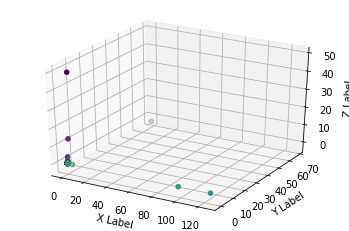

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

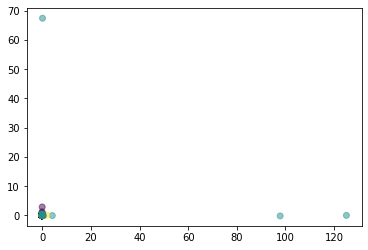

In [47]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features sin estandarizar

In [48]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train_unique_up100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


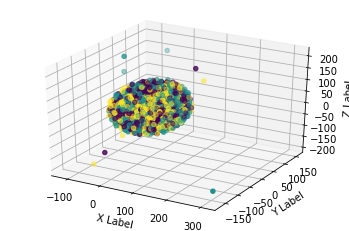

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

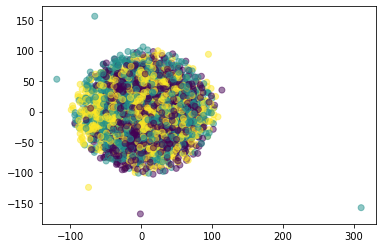

In [50]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Estandarización features

In [51]:
#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unique_up100)

In [52]:
#####
#x_test = scaler.transform(x_test)
#####

## Visualización PCA - Features estandarizadas

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train)

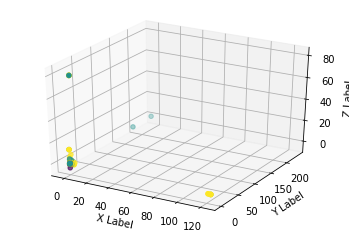

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

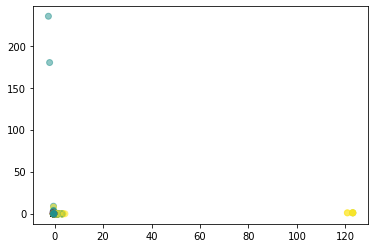

In [55]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features estandarizadas

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


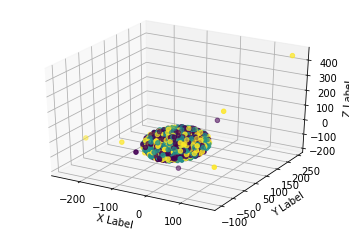

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [58]:
x_train_unique_up100.shape

(2696, 457)

## Visualización PCA - Features sin estandarizar

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train_unique_up100)

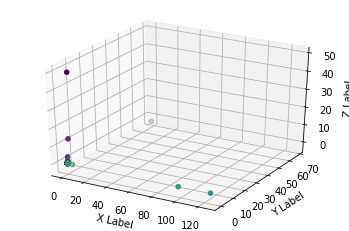

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

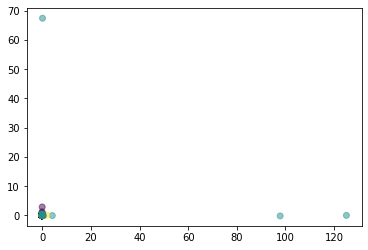

In [61]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features sin estandarizar

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train_unique_up100)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


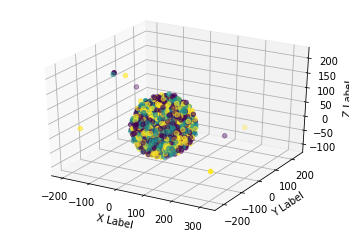

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

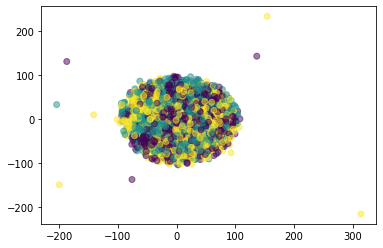

In [64]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Estandarización features

In [65]:
#####
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unique_up100)

In [ ]:
#####
#x_test = scaler.transform(x_test)
#####

## Visualización PCA - Features estandarizadas

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
weights = pca.fit_transform(x_train)

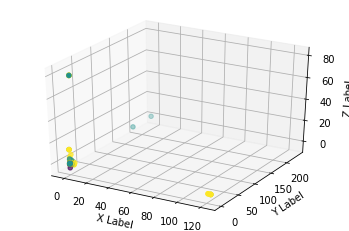

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

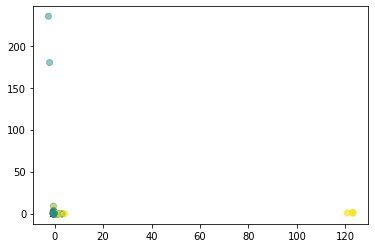

In [68]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)

## Visualización TSNE - Features estandarizadas

In [69]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
weights = tsne.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


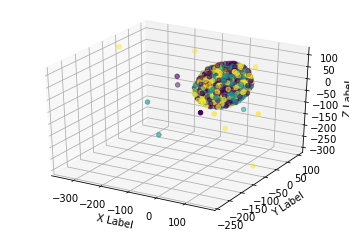

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=y_train)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

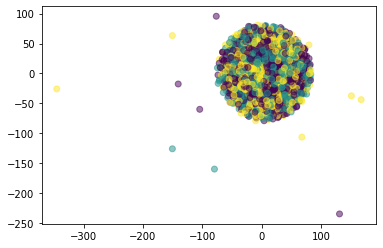

In [71]:
plt.scatter(weights[:,0], weights[:,1], c=y_train, alpha=0.5)



## MODELO BASICO PARA ESTIMAR VOLA LABEL EN BASE AL TEXTO



In [85]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

history = model.fit(x_train, y_train, epochs=100, batch_size=128,  validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 1.1012 - accuracy: 0.3520 - val_loss: 1.1038 - val_accuracy: 0.3778
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 1.0813 - accuracy: 0.3506 - val_loss: 1.0889 - val_accuracy: 0.3352
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0670 - accuracy: 0.3924 - val_loss: 1.0784 - val_accuracy: 0.3593
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 1.0544 - accuracy: 0.4114 - val_loss: 1.0693 - val_accuracy: 0.3704
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0423 - accuracy: 0.4156 - val_loss: 1.0652 - val_accuracy: 0.3741
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0304 - accuracy: 0.4249 - val_loss: 1.0586 - val_accuracy: 0.3870
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0176 - accuracy: 0.4351 - val_loss: 1.0555 - val_accuracy: 0.4056
Epoch 8/100


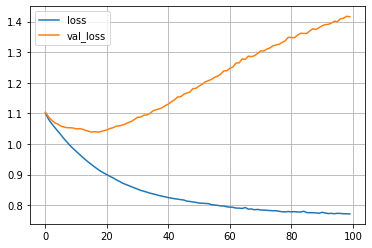

In [86]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

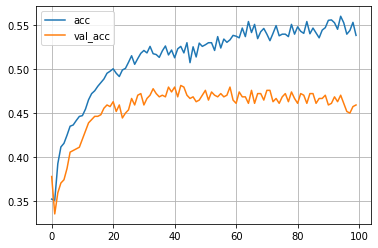

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()